In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.io.wavfile import read, write
from pydub import AudioSegment
import os

In [3]:
img_path = './data/4.jpg'
audio_path = './data/godzilla_roar.wav'
img_save_path = './images/'
audio_save_path = './audios/'

In [4]:
if not os.path.exists(img_save_path):
    os.makedirs(img_save_path)
if not os.path.exists(audio_save_path):
    os.makedirs(audio_save_path)

# PCA algorithm

In [5]:
def PCA(X, k):
    h, w = X.shape
    # Step 1: Find mean vector
    x_mean = np.mean(X, axis=0) 
    
    # Step 2: Subtract mean
    X_hat = X - x_mean
    
    # Step 3: Compute Covariance matrix
    cov_mat = np.cov(X_hat, rowvar=0)
    
    # Step 4: Compute eigenvalues and eigenvectors
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    sorted_eig_vals = np.argsort(eig_vals)[::-1]
    eig_vals = eig_vals[sorted_eig_vals]
    eig_vecs = eig_vecs[:, sorted_eig_vals]
    
    # Step 5: Choose k
    #eig_vals_filter = sorted_eig_vals[:k]
    U = eig_vecs[:, :k]  
    
    # Step 6: Compute compressed matrix
    Z = X_hat @ U 
    
    # Step 7: Reconstruct
    Xapprox = (Z @ U.T) + x_mean
    #Xapprox = np.uint8(np.absolute(Xapprox))
    Xapprox = Xapprox.real
    
    return Xapprox

# Image Compression

In [6]:
def read_img(path):
    img = Image.open(path).convert('L')
    img_arr = np.asarray(img)
    return img_arr

In [7]:
def show_img(arr):
    plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
    plt.show()

In [8]:
def save_img(arr, k):
    filename = f'k_{k}.jpg'
    path = os.path.join(img_save_path, filename)
    imk = Image.fromarray(arr).convert('L')
    imk.save(path)

In [9]:
def image_compress(img_arr):
    h, w = img_arr.shape
    for k in range(1, min(h,w), 5):
        Xapprox = PCA(img_arr, k)
        save_img(Xapprox, k)  
    print('Image compression completed !!!')

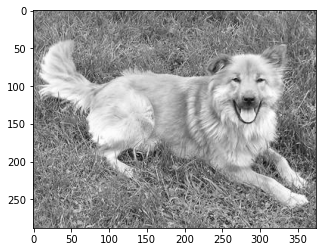

In [10]:
img_arr = read_img(img_path)
# Show the original image
show_img(img_arr)

In [10]:
image_compress(img_arr)

# Audio Compression

In [11]:
def read_audio(path):    
    rate, data = read(path)
    audio_arr = np.array(data, dtype=float) 
    return audio_arr[:, 0], rate

In [12]:
def convert_audio_to_matrix(audio_arr, matrix_size):
    hanging = matrix_size - np.mod(len(audio_arr), matrix_size)
    padded = np.lib.pad(audio_arr, (0, hanging), 'constant', constant_values=0)
    audio_reshaped = padded.reshape((len(padded) // matrix_size, matrix_size))
    return audio_reshaped, len(padded), hanging

In [18]:
def save_audio(k, array, rate):
    filename = f'k_{k}.wav'
    path = os.path.join(audio_save_path, filename)
    write(path, rate, array)

In [23]:
def compress_sound(audio_arr, rate):
    audio_reshaped, padded_len, hanging = convert_audio_to_matrix(audio_arr, 1024)
    for k in range(1, 1024, 30):
        Xapprox = PCA(audio_reshaped, k)
        Xapprox = Xapprox.reshape((padded_len))
        Xapprox = Xapprox[0:-hanging]
        save_audio(k, Xapprox, rate)
    print('Audio Compression finished !!!')

In [24]:
audio_arr, rate = read_audio(audio_path)
compress_sound(audio_arr, rate)

Audio Compression finished !!!
